# "Pemodelan Kebutuhan Kalori dan Rekomendasi Makanan Sehat Berdasarkan Profil Pengguna" Menggunakan SVM, K-Nearest Neighbor ( KNN ), Naive Bayes dan Assamble

### Matakuliah : Ilmu Data 7B
### Nama Anggota : 
### Adi Trianda Agustina (213510367)
### Farhan Alifviandi (213510299)
### Joan Risky (213510803)
### Khairul Amri Matondang (213510187)

In [1]:
# Library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tabulate import tabulate

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} =========================================> ")
    print(classification_report(y_test, y_pred))
    print("Akurasi:", accuracy_score(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix - {model_name}")
    return accuracy_score(y_test, y_pred)

# Fungsi untuk K-Fold Cross-Validation
def kfold_cross_val(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"\nK-Fold Cross-Validation - {model.__class__.__name__}:")
    print(f"Mean Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    return cv_scores.mean()

In [2]:
# Membaca file CSV
file_path = "nutrisi.csv"  
df = pd.read_csv(file_path, delimiter=";")
print(df.head())

                        FoodGroup  \
0                   Beef Products   
1                   Pork Products   
2  Finfish and Shellfish Products   
3          Dairy and Egg Products   
4                          Sweets   

                                             Descrip  Energy_kcal  Protein_g  \
0  Beef, chuck, under blade steak, boneless, sepa...        275.0      28.23   
1  Pork, fresh, loin, center rib (roasts), bone-i...        248.0      26.99   
2                Crustaceans, shrimp, untreated, raw         85.0      20.10   
3  Cheese spread, American or Cheddar cheese base...        176.0      13.41   
4    Candies, fudge, chocolate, prepared-from-recipe        411.0       2.39   

   Fat_g  Carb_g  Sugar_g  
0  18.00    0.00     0.00  
1  14.68    0.00     0.00  
2   0.51    0.00     0.00  
3   8.88   10.71     7.06  
4  10.41   76.44    73.12  


In [3]:
# Menghapus baris dengan nilai NaN
df = df.dropna()

# Menghapus kolom yang memiliki nama dimulai dengan "Unnamed"
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Menampilkan data untuk memastikan kolom "Unnamed" telah dihapus
print(df.head())

                        FoodGroup  \
0                   Beef Products   
1                   Pork Products   
2  Finfish and Shellfish Products   
3          Dairy and Egg Products   
4                          Sweets   

                                             Descrip  Energy_kcal  Protein_g  \
0  Beef, chuck, under blade steak, boneless, sepa...        275.0      28.23   
1  Pork, fresh, loin, center rib (roasts), bone-i...        248.0      26.99   
2                Crustaceans, shrimp, untreated, raw         85.0      20.10   
3  Cheese spread, American or Cheddar cheese base...        176.0      13.41   
4    Candies, fudge, chocolate, prepared-from-recipe        411.0       2.39   

   Fat_g  Carb_g  Sugar_g  
0  18.00    0.00     0.00  
1  14.68    0.00     0.00  
2   0.51    0.00     0.00  
3   8.88   10.71     7.06  
4  10.41   76.44    73.12  


In [4]:
# Menambahkan kolom status_sehat berdasarkan kriteria yang diberikan
df["status"] = ((df["Protein_g"] >= 20) & 
               (df["Fat_g"] <= 22) & 
               (df["Carb_g"] <= 50) & 
               (df["Sugar_g"] <= 16)).astype(int)  # Menggunakan semua kriteria untuk menentukan status sehat

# Memilih kolom numerik untuk mengisi nilai kosong dengan rata-rata
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())  # Mengisi nilai yang hilang dengan rata-rata kolom

# Menyiapkan data untuk model
X = df[["Protein_g", "Fat_g", "Carb_g", "Sugar_g"]]  # Fitur yang digunakan
y = df["status"]  # Target: status sehat atau tidak sehat

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



SVM =========================================> 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       404
           1       0.93      0.98      0.96       111

    accuracy                           0.98       515
   macro avg       0.96      0.98      0.97       515
weighted avg       0.98      0.98      0.98       515

Akurasi: 0.9805825242718447


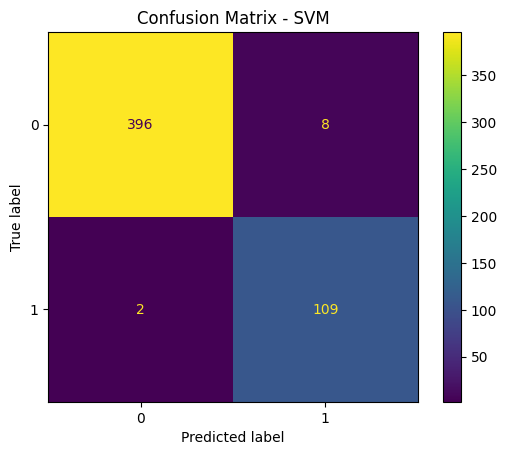


K-Fold Cross-Validation - SVC:
Mean Accuracy: 0.9819 ± 0.0050

K-Nearest Neighbors =========================================> 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       404
           1       0.98      0.96      0.97       111

    accuracy                           0.99       515
   macro avg       0.99      0.98      0.98       515
weighted avg       0.99      0.99      0.99       515

Akurasi: 0.9883495145631068


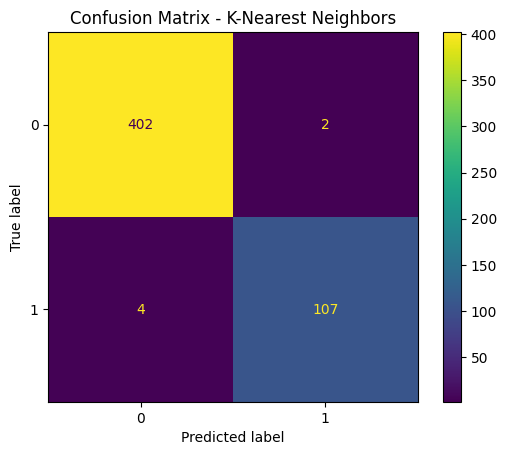


K-Fold Cross-Validation - KNeighborsClassifier:
Mean Accuracy: 0.9895 ± 0.0051

Naive Bayes =========================================> 
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       404
           1       0.67      0.97      0.79       111

    accuracy                           0.89       515
   macro avg       0.83      0.92      0.86       515
weighted avg       0.92      0.89      0.90       515

Akurasi: 0.8893203883495145


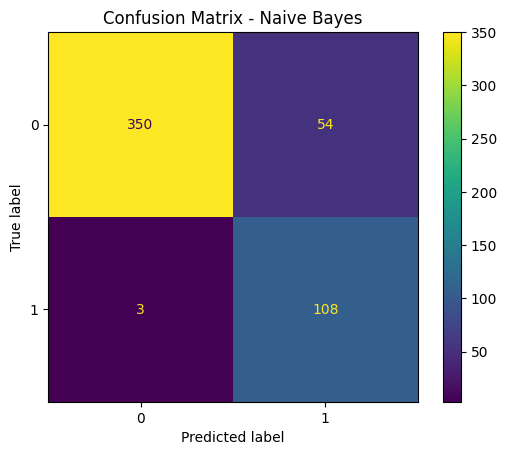


K-Fold Cross-Validation - GaussianNB:
Mean Accuracy: 0.8880 ± 0.0180

Voting Classifier =========================================> 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       404
           1       0.93      0.98      0.96       111

    accuracy                           0.98       515
   macro avg       0.96      0.98      0.97       515
weighted avg       0.98      0.98      0.98       515

Akurasi: 0.9805825242718447


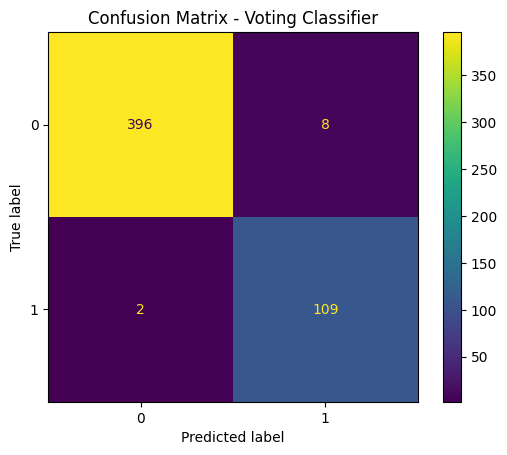


K-Fold Cross-Validation - VotingClassifier:
Mean Accuracy: 0.9831 ± 0.0062


In [5]:
# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_accuracy = evaluate_model(svm_model, X_test_scaled, y_test, model_name="SVM")
svm_cv = kfold_cross_val(svm_model, X, y)  # K-Fold Cross-Validation

# KNN dengan Hyperparameter Tuning
knn_params = {'n_neighbors': range(1, 11)}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = evaluate_model(knn_model.best_estimator_, X_test_scaled, y_test, model_name="K-Nearest Neighbors")
knn_cv = kfold_cross_val(knn_model.best_estimator_, X, y)  # K-Fold Cross-Validation

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_accuracy = evaluate_model(nb_model, X_test, y_test, model_name="Naive Bayes")
nb_cv = kfold_cross_val(nb_model, X, y)  # K-Fold Cross-Validation

# Voting Classifier
voting_clf = VotingClassifier(estimators=[ 
    ('svm', svm_model),
    ('knn', knn_model.best_estimator_),
    ('nb', nb_model)
], voting='hard')
voting_clf.fit(X_train_scaled, y_train)
voting_accuracy = evaluate_model(voting_clf, X_test_scaled, y_test, model_name="Voting Classifier")
voting_cv = kfold_cross_val(voting_clf, X, y)  # K-Fold Cross-Validation

In [6]:
# Menampilkan jumlah makanan sehat dan tidak sehat
jumlah_sehat = df[df["status"] == 1].shape[0]
jumlah_tidak_sehat = df[df["status"] == 0].shape[0]

print("\nJumlah Makanan Sehat: ", jumlah_sehat)
print("Jumlah Makanan Tidak Sehat: ", jumlah_tidak_sehat)


Jumlah Makanan Sehat:  348
Jumlah Makanan Tidak Sehat:  1367


In [7]:
# Menyaring dan menampilkan makanan yang sehat
makanan_sehat_sorted = df[df["status"] == 1].sort_values(by="Energy_kcal", ascending=False).reset_index(drop=True)
makanan_sehat_sorted_top50 = makanan_sehat_sorted.head(50).copy()  # Ambil hanya 50 data teratas
makanan_sehat_sorted_top50["no."] = range(1, len(makanan_sehat_sorted_top50) + 1)
makanan_sehat_sorted_top50["status"] = "Sehat"

# Menampilkan tabel makanan sehat (Top 50)
print("\n<==================== [ Tabel Makanan Sehat (Top 50) ] ====================>")
print(tabulate(makanan_sehat_sorted_top50[["no.", "FoodGroup", "Descrip", "Energy_kcal", "Protein_g", "Fat_g", "Carb_g", "Sugar_g", "status"]],
               headers="keys", 
               tablefmt="fancy_grid", 
               numalign="right", 
               stralign="center", 
               showindex=False, 
               maxcolwidths=[5, 25, 15, 10, 10, 10, 10, 10, 15])) 


<==================== [ Tabel Makanan Sehat (Top 50) ] ====================>
╒═══════╤═════════════════════════╤═════════════════╤═══════════════╤═════════════╤═════════╤══════════╤═══════════╤══════════╕
│   no. │        FoodGroup        │     Descrip     │   Energy_kcal │   Protein_g │   Fat_g │   Carb_g │   Sugar_g │  status  │
╞═══════╪═════════════════════════╪═════════════════╪═══════════════╪═════════════╪═════════╪══════════╪═══════════╪══════════╡
│     1 │ Dairy and Egg Products  │     Protein     │           411 │       45.71 │   17.14 │     18.5 │      5.71 │  Sehat   │
│       │                         │   supplement,   │               │             │         │          │           │          │
│       │                         │   milk based,   │               │             │         │          │           │          │
│       │                         │  Muscle Milk,   │               │             │         │          │           │          │
│       │                 

In [8]:
# Menyaring dan menampilkan makanan yang tidak sehat
makanan_tidak_sehat_sorted = df[df["status"] == 0].sort_values(by="Energy_kcal", ascending=False).reset_index(drop=True)
makanan_tidak_sehat_sorted_top50 = makanan_tidak_sehat_sorted.head(50).copy()  # Ambil hanya 50 data teratas
makanan_tidak_sehat_sorted_top50["no."] = range(1, len(makanan_tidak_sehat_sorted_top50) + 1)
makanan_tidak_sehat_sorted_top50["status"] = "Tidak Sehat"

# Menampilkan tabel makanan tidak sehat (Top 50)
print("\n<==================== [ Tabel Makanan Tidak Sehat (Top 50) ] ====================>")
print(tabulate(makanan_tidak_sehat_sorted_top50[["no.", "FoodGroup", "Descrip", "Energy_kcal", "Protein_g", "Fat_g", "Carb_g", "Sugar_g", "status"]],
               headers="keys", 
               tablefmt="fancy_grid", 
               numalign="right", 
               stralign="center", 
               showindex=False, 
               maxcolwidths=[5, 25, 15, 10, 10, 10, 10, 10, 15])) 



<==================== [ Tabel Makanan Tidak Sehat (Top 50) ] ====================>
╒═══════╤════════════════════════╤═════════════════╤═══════════════╤═════════════╤═════════╤══════════╤═══════════╤═════════════╕
│   no. │       FoodGroup        │     Descrip     │   Energy_kcal │   Protein_g │   Fat_g │   Carb_g │   Sugar_g │   status    │
╞═══════╪════════════════════════╪═════════════════╪═══════════════╪═════════════╪═════════╪══════════╪═══════════╪═════════════╡
│     1 │     Fats and Oils      │    Fish oil,    │           902 │           0 │     100 │        0 │         0 │ Tidak Sehat │
│       │                        │     herring     │               │             │         │          │           │             │
├───────┼────────────────────────┼─────────────────┼───────────────┼─────────────┼─────────┼──────────┼───────────┼─────────────┤
│     2 │     Fats and Oils      │   Shortening    │           900 │           0 │     100 │        0 │         0 │ Tidak Sehat │
│     

In [9]:
# Menampilkan perbandingan akurasi
print("\nAkurasi Model:")
print(f"- SVM: {svm_accuracy} (K-Fold: {svm_cv})")
print(f"- K-Nearest Neighbors: {knn_accuracy} (K-Fold: {knn_cv})")
print(f"- Naive Bayes: {nb_accuracy} (K-Fold: {nb_cv})")
print(f"- Voting Classifier: {voting_accuracy} (K-Fold: {voting_cv})")


Akurasi Model:
- SVM: 0.9805825242718447 (K-Fold: 0.9819241982507287)
- K-Nearest Neighbors: 0.9883495145631068 (K-Fold: 0.9895043731778426)
- Naive Bayes: 0.8893203883495145 (K-Fold: 0.8880466472303208)
- Voting Classifier: 0.9805825242718447 (K-Fold: 0.9830903790087463)


In [10]:
train_size = len(X_train)
test_size = len(X_test)
total_size = len(df)
print(f"Perbandingan data latih dan data uji: {train_size}:{test_size}")
print(f"Jumlah keseluruhan data di dataset: {total_size}")

Perbandingan data latih dan data uji: 1200:515
Jumlah keseluruhan data di dataset: 1715


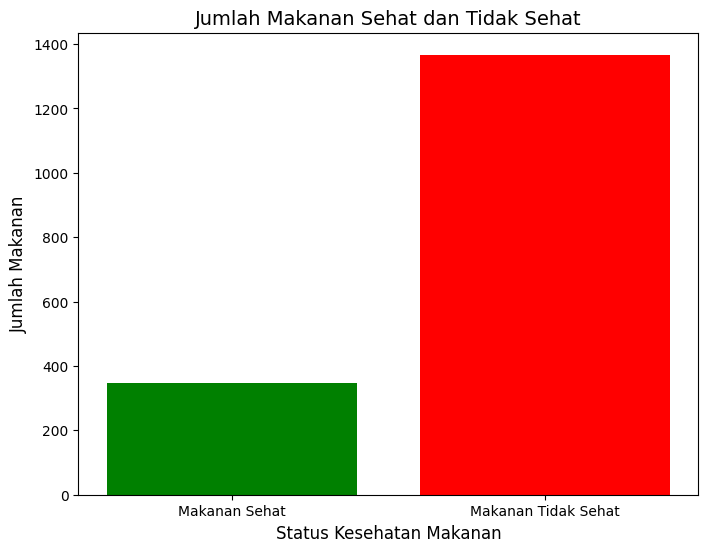

In [11]:
# Jumlah makanan sehat dan tidak sehat
lulus_count = [jumlah_sehat, jumlah_tidak_sehat]

# Plot grafik batang
plt.figure(figsize=(8, 6))
plt.bar(["Makanan Sehat", "Makanan Tidak Sehat"], lulus_count, color=["green", "red"])

# Menambahkan judul dan label
plt.title("Jumlah Makanan Sehat dan Tidak Sehat", fontsize=14)
plt.xlabel("Status Kesehatan Makanan", fontsize=12)
plt.ylabel("Jumlah Makanan", fontsize=12)

# Menampilkan grafik
plt.show()

In [12]:
# Fungsi untuk menghitung BMR dan TDEE
def calculate_bmr_and_tdee(age, weight, height, gender, activity_level):
    if gender == 'pria':
        # Rumus BMR untuk pria (Harris-Benedict)
        bmr = 66 + (13.75 * weight) + (5.003 * height) - (6.75 * age)
    else:
        # Rumus BMR untuk wanita (Harris-Benedict)
        bmr = 655 + (9.563 * weight) + (1.850 * height) - (4.676 * age)
    
    # Faktor aktivitas
    activity_factors = {
        'sangat aktif': 1.9,
        'aktif': 1.725,
        'sedang': 1.55,
        'ringan': 1.375,
        'tidak aktif': 1.2
    }
    
    tdee = bmr * activity_factors[activity_level]
    return bmr, tdee


# Input dari pengguna
name = input("Masukkan nama Anda: ")
age = int(input("Masukkan umur Anda (tahun): "))
weight = float(input("Masukkan berat badan Anda (kg): "))
height = float(input("Masukkan tinggi badan Anda (cm): "))
gender = input("Masukkan jenis kelamin Anda (pria/wanita): ").lower()
activity_level = input("Masukkan tingkat aktivitas Anda (tidak_aktif, ringan, sedang, aktif, sangat_aktif): ").lower()

# Hitung BMR dan TDEE
bmr, tdee = calculate_bmr_and_tdee(age, weight, height, gender, activity_level)

print(f"\nBMR Anda: {bmr:.2f} kcal/hari")
print(f"TDEE Anda: {tdee:.2f} kcal/hari")

# Filter makanan sehat (status = 1) dan urutkan berdasarkan kalori tertinggi
makanan_sehat = df[df["status"] == 1].copy()
makanan_sehat = makanan_sehat.sort_values(by="Energy_kcal", ascending=False).reset_index(drop=True)  # Mengurutkan data berdasarkan kalori tertinggi

# Menghitung adjusted_weight
makanan_sehat['adjusted_weight'] = (tdee / makanan_sehat["Energy_kcal"]) * 100  # Sesuaikan dengan kebutuhan kalori

# Mengambil makanan sehat dengan kalori tertinggi
makanan_sehat_teratas = makanan_sehat.head(40)

# Menampilkan rekomendasi makanan
print("\n<==================== [ 10 Rekomendasi Makanan Sehat ] ====================>")
if makanan_sehat_teratas.empty:
    print("Tidak ada makanan yang memenuhi kriteria.")
else:
    for _, row in makanan_sehat_teratas.iterrows():
        print(f"{row['FoodGroup']} || {row['Descrip']} - Kalori: {row['Energy_kcal']:.1f} kcal/100g. Jumlah yang disarankan: {row['adjusted_weight']:.2f} gram.")


Masukkan nama Anda:  Han
Masukkan umur Anda (tahun):  23
Masukkan berat badan Anda (kg):  56
Masukkan tinggi badan Anda (cm):  172
Masukkan jenis kelamin Anda (pria/wanita):  pria
Masukkan tingkat aktivitas Anda (tidak_aktif, ringan, sedang, aktif, sangat_aktif):  sedang



BMR Anda: 1541.27 kcal/hari
TDEE Anda: 2388.96 kcal/hari

<==================== [ 10 Rekomendasi Makanan Sehat ] ====================>
Dairy and Egg Products || Protein supplement, milk based, Muscle Milk, powder - Kalori: 411.0 kcal/100g. Jumlah yang disarankan: 581.26 gram.
Dairy and Egg Products || Protein supplement, milk based, Muscle Milk Light, powder - Kalori: 396.0 kcal/100g. Jumlah yang disarankan: 603.27 gram.
Beverages || Beverages, ABBOTT, EAS whey protein powder - Kalori: 385.0 kcal/100g. Jumlah yang disarankan: 620.51 gram.
Cereal Grains and Pasta || Vital wheat gluten - Kalori: 370.0 kcal/100g. Jumlah yang disarankan: 645.67 gram.
Sweets || Gelatins, dry powder, unsweetened - Kalori: 335.0 kcal/100g. Jumlah yang disarankan: 713.12 gram.
Nut and Seed Products || Seeds, sesame flour, low-fat - Kalori: 333.0 kcal/100g. Jumlah yang disarankan: 717.41 gram.
Nut and Seed Products || Seeds, cottonseed flour, low fat (glandless) - Kalori: 332.0 kcal/100g. Jumlah yang disaranka

# Sumber
~~Menurut Hello Sehat, Angka Kecukupan Gizi (AKG) dalam Permenkes No. 28 Tahun 2019 menyebutkan kebutuhan protein harian orang dewasa adalah 60 gram untuk wanita dan 65 gram untuk pria.

~~Menurut Siloam Hospitals, According to Permenkes Number 30 of 2013, the recommended daily fat intake per individual is no more than 67 grams (equivalent to 5 tablespoons of oil) or 20–25% of the individual’s total daily energy.

~~Menurut Artikel Chub.com, Pada kondisi normal, asupan karbohidrat yang disarankan lebih dari setengah total kalori. Jika asupan 2.000 kalori per hari maka porsi karbohidrat sekitar 900-1300 atau sebanyak 225-325 gram.

~~Menurut Dinas Kesehatan Kabupaten Gunung Kidul, Batas konsumsi gula yang disarankan oleh Kementerian Kesehatan RI (Kemkes) per orang per hari yaitu 50 gram (4 sendok makan).

# Penjelasan

1. Support Vector Machine (SVM) adalah algoritma pembelajaran mesin untuk klasifikasi dan regresi.

2. K-Nearest Neighbor ( KNN ) adalah algoritma pembelajaran mesin sederhana untuk klasifikasi dan regresi, yang bekerja dengan mengelompokkan data berdasarkan jarak terdekat ke sejumlah tetangga (k).

3. Naive Bayes adalah algoritma pembelajaran mesin berbasis probabilitas yang digunakan untuk klasifikasi, dengan asumsi bahwa semua fitur bersifat independen (naive). Algoritma ini menggunakan Teorema Bayes untuk menghitung kemungkinan suatu data termasuk dalam kelas tertentu.

4. Teknik Assamble yang dimana ini buat meminimalisir dari yang namanya overfitting dengan menggabungkan ke 3 metode untuk menciptakan akurasi yang optimal

5. metode k-fold adalah teknik evaluasi model yang membagi dataset menjadi beberapa lipatan (folds) untuk mengukur kinerja secara lebih akurat

Perbandingan data latih dan data uji: 1200:515
Jumlah keseluruhan data di dataset: 1715

Jumlah Makanan Sehat:  348
Jumlah Makanan Tidak Sehat:  1367

Akurasi Model:
- SVM: 0.9805825242718447 (K-Fold: 0.9819241982507287)
- K-Nearest Neighbors: 0.9883495145631068 (K-Fold: 0.9895043731778426)
- Naive Bayes: 0.8893203883495145 (K-Fold: 0.8880466472303208)
- Voting Classifier: 0.9805825242718447 (K-Fold: 0.9830903790087

# Dapat disimpulkan bahwa

Dari 1715 makanan, hanya 348 makanan yang sehat untuk dikonsumsi oleh pengguna.

Dari hasil akurasi model di a bil:

K-Nearest Neighbors (KNN) memiliki performa terbaik, dengan akurasi pengujian 98.83% dan rata-rata K-Fold sebesar 98.95%. Hal ini menunjukkan bahwa KNN sangat efektif untuk dataset ini, dengan hasil yang konsisten pada validasi silang.

Support Vector Machine (SVM) dan Voting Classifier menunjukkan performa yang hampir sama, dengan akurasi pengujian sekitar 98.06% dan rata-rata K-Fold mendekati 98.19% dan 98.31%, masing-masing. Ini menunjukkan bahwa kedua model cukup andal tetapi sedikit di bawah KNN.

Naive Bayes memiliki akurasi paling rendah di antara semua model, dengan akurasi pengujian 88.93% dan rata-rata K-Fold sebesar 88.80%. Meski lebih cepat dan sederhana, model ini kurang sesuai untuk dataset ini, mungkin karena asumsi independensi antar fitur tidak terpenuhi.

KNN adalah model terbaik untuk dataset ini, diikuti oleh SVM dan Voting Classifier.
Naive Bayes kurang ideal untuk dataset ini karena akurasi yang lebih rendah dibandingkan model lainnya.63)
